# Week 4 A
### Name: Jay Zhang

To solve the question: "What's the relationship between the TP53 gene and Liver Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Liver_Cancer_(LIHC)/TCGA.LIHC.sampleMap_LIHC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Liver_Cancer_(LIHC)/TCGA.LIHC.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [2]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_LIHC_mutation_bcgsc_gene,_GENOMIC_ID_data/public/TCGA/LIHC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_LIHC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_LIHC_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_LIHC_mutation_broad_gene,_GENOMIC_ID_TCGA_LIHC_hMethyl450
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01,TCGA-2V-A95S-01,53796be6-1c87-448a-9928-3c640e9d3414,NaN,53796be6-1c87-448a-9928-3c640e9d3414,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01A-11D-A36Y-05
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,58.0,3.5,...,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01A-12D-A383-05
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,51.0,3.5,...,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01A-11D-A383-05
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,55.0,3.5,...,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,6f3f7f73-b031-424e-ba7c-263f802dd6cf,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01A-11D-A383-05
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01A-11D-A383-05


In [3]:
# Display gene dataset
gene_data.head()

,TCGA-FV-A495-01,TCGA-G3-A3CH-11,TCGA-CC-A3MB-01,TCGA-BC-A3KF-01,TCGA-DD-A4NV-01,TCGA-CC-A1HT-01,TCGA-BD-A3EP-01,TCGA-FV-A3R2-11,TCGA-CC-A3MA-01,TCGA-ZP-A9CV-01,...,TCGA-UB-A7ME-01,TCGA-DD-A4NR-01,TCGA-G3-A25U-01,TCGA-DD-AAE6-01,TCGA-G3-AAV2-01,TCGA-BC-A10Z-11,TCGA-ZP-A9CY-01,TCGA-DD-A39Y-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.317808,1.154608,1.379008,1.297208,2.152708,0.630408,1.704608,1.623908,-0.181992,2.131908,...,2.054208,2.233208,2.631908,2.681008,0.450608,1.612908,1.976308,1.730308,1.894908,1.661008
HIF3A,-0.306526,-0.170026,-1.553426,-2.617326,-0.769026,1.332674,-1.645126,-0.266926,-2.699826,-0.332026,...,-2.335226,-2.547826,-0.016726,-2.982226,-0.632926,-2.351726,-1.031826,-5.554726,-1.795626,-1.608526
RNF17,3.664565,-0.531035,-0.531035,-0.531035,-0.531035,3.990065,6.344665,-0.531035,-0.531035,-0.531035,...,0.141565,6.296965,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,-0.272872,-0.108572,0.301528,0.815528,-0.315972,0.076128,0.224028,-0.039372,-0.830372,0.447428,...,-0.101772,0.100028,-0.631672,0.693828,0.084428,0.026428,-0.024972,0.363228,0.313828,0.041328
RNF11,-1.368378,0.430122,-1.143078,-1.021978,-0.131078,-0.153778,-0.531678,-0.151678,-0.022478,-0.084578,...,-0.511478,-0.935778,-0.172778,-1.028278,-0.365578,0.075122,-0.097878,-0.338378,0.609522,0.292622


In [4]:
# Set Basic info
gene_fullname = 'TP53 gene'
gene = 'tp53'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Liver Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 109 features, and the gene dataset includes 20530 genes


In [5]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,58.0,3.5,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,51.0,3.5,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,55.0,3.5,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [6]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2Y-A9GS-01,-21318.0,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,-18768.0,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,-20187.0,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,-20011.0,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688
TCGA-2Y-A9GW-01,-23587.0,1.946808,-2.720726,-0.531035,0.060628,-0.660778,-0.31181,-0.215794,0.756054,0.397301,...,0.071822,1.082783,0.362567,-1.28139,-1.118377,-0.624886,0.903873,1.857205,-0.228533,0.692988


In [7]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2Y-A9GS-01,-21318.0,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,-18768.0,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,-20187.0,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,-20011.0,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1
TCGA-2Y-A9GW-01,-23587.0,1.946808,-2.720726,-0.531035,0.060628,-0.660778,-0.31181,-0.215794,0.756054,0.397301,...,1.082783,0.362567,-1.28139,-1.118377,-0.624886,0.903873,1.857205,-0.228533,0.692988,1


In [8]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

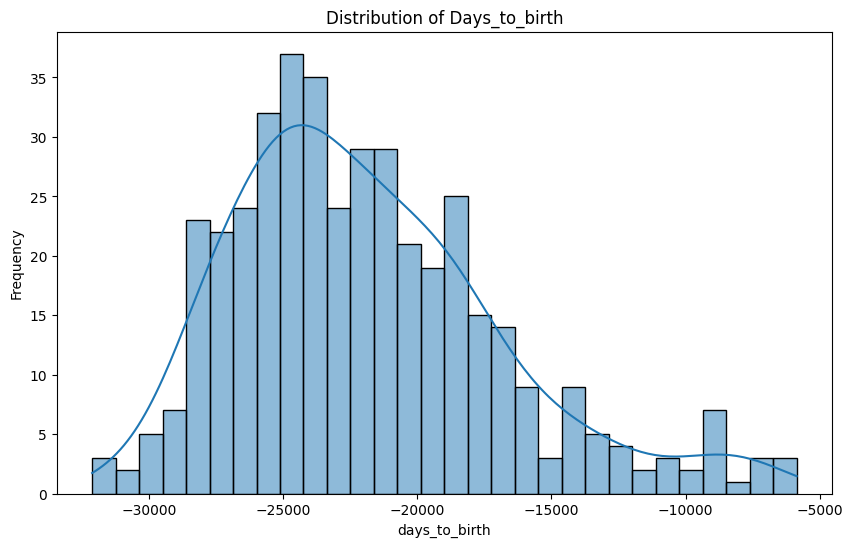

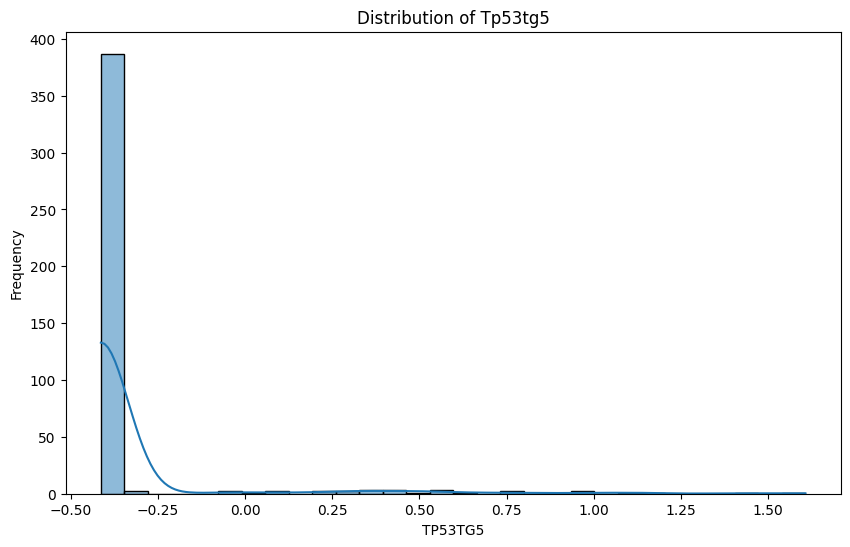

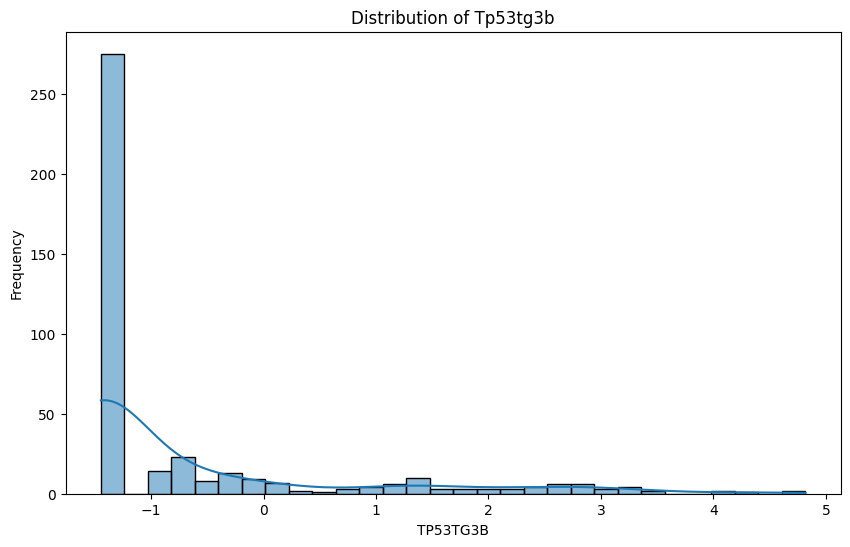

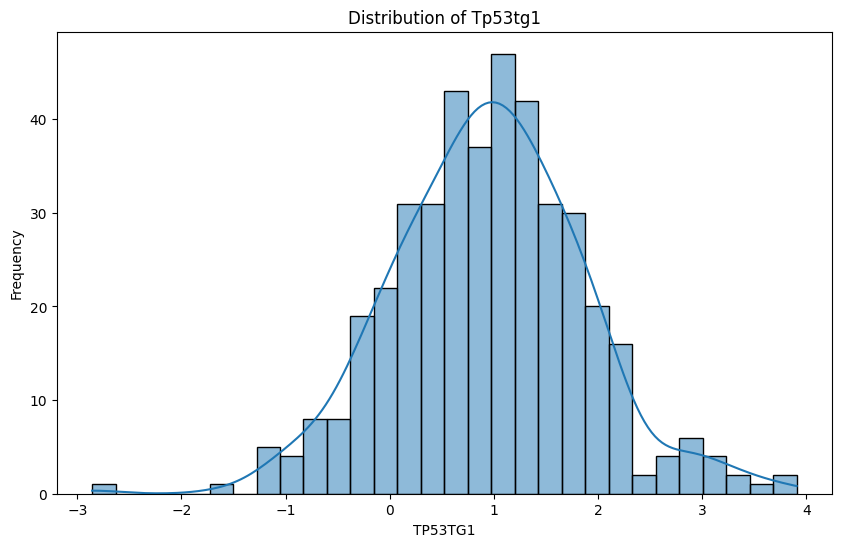

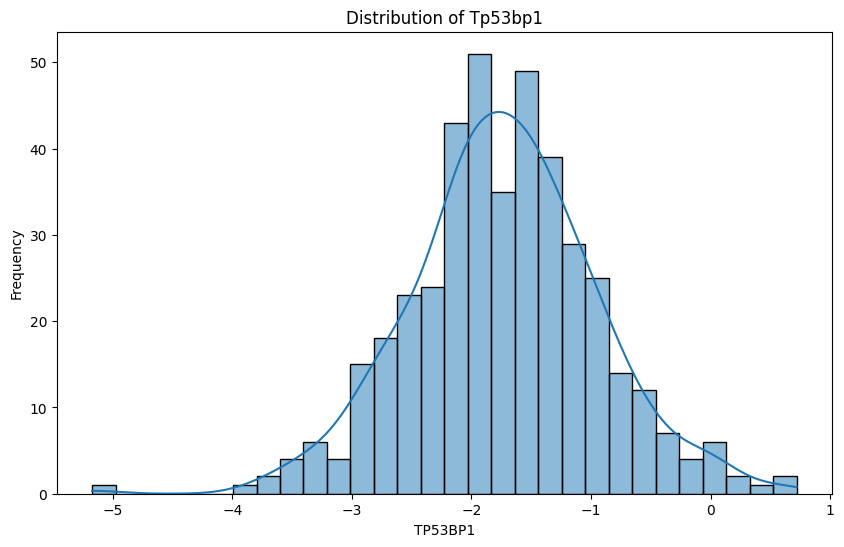

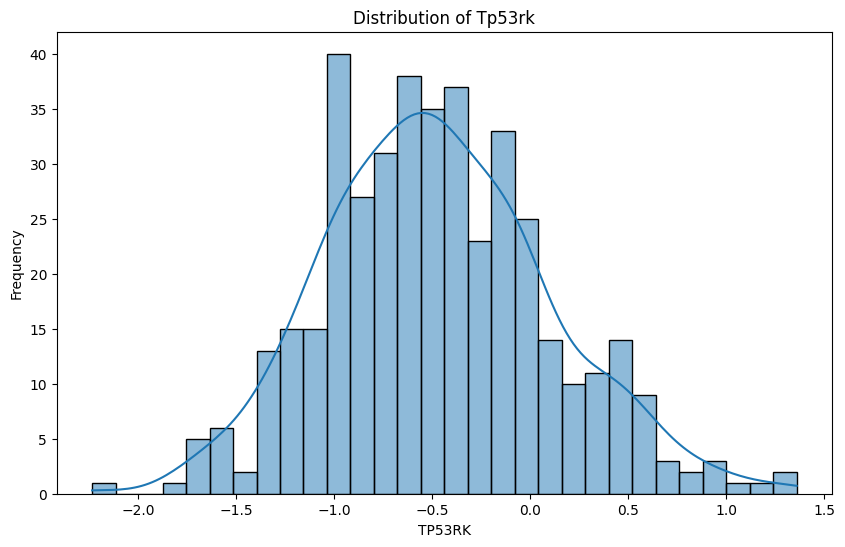

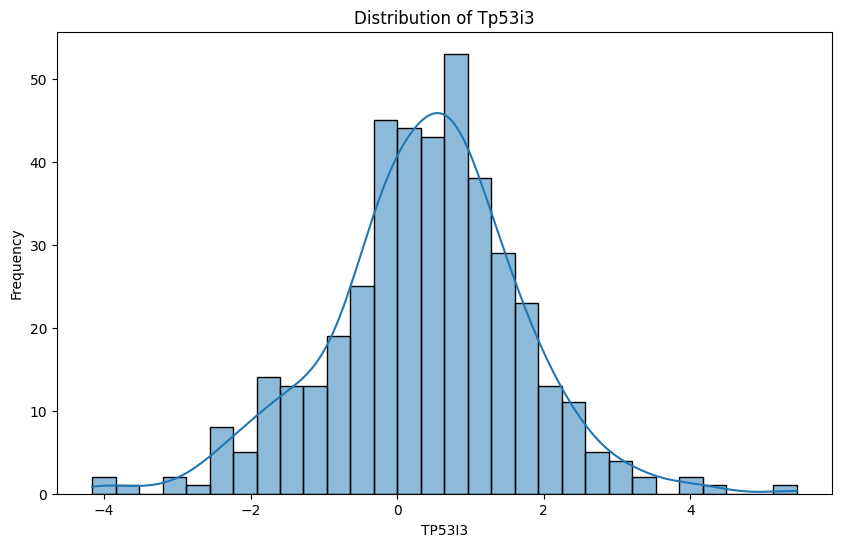

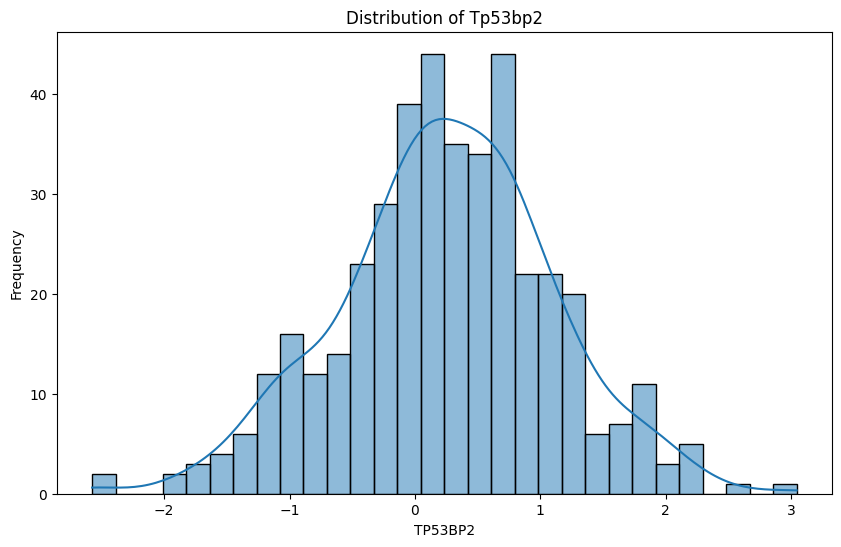

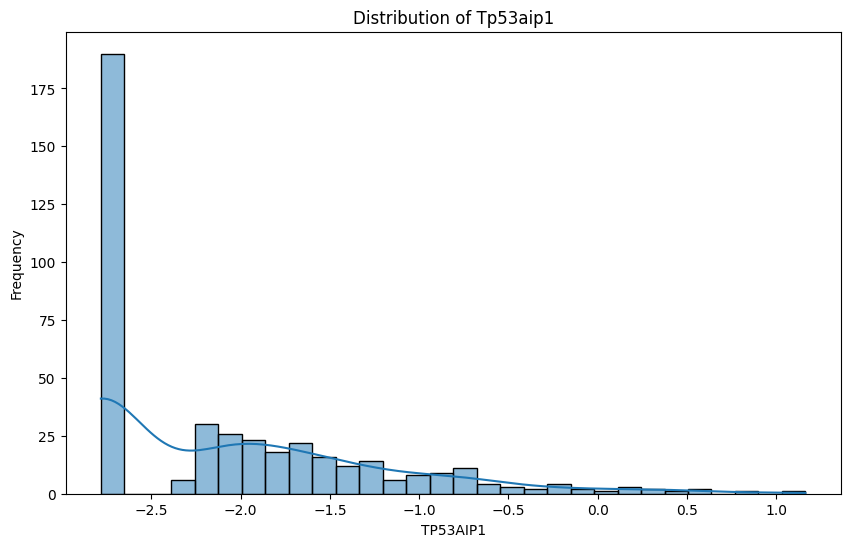

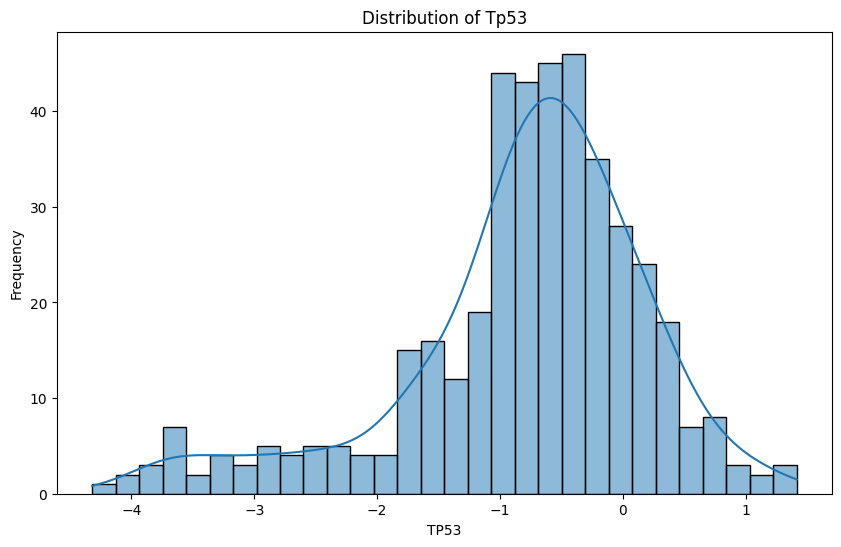

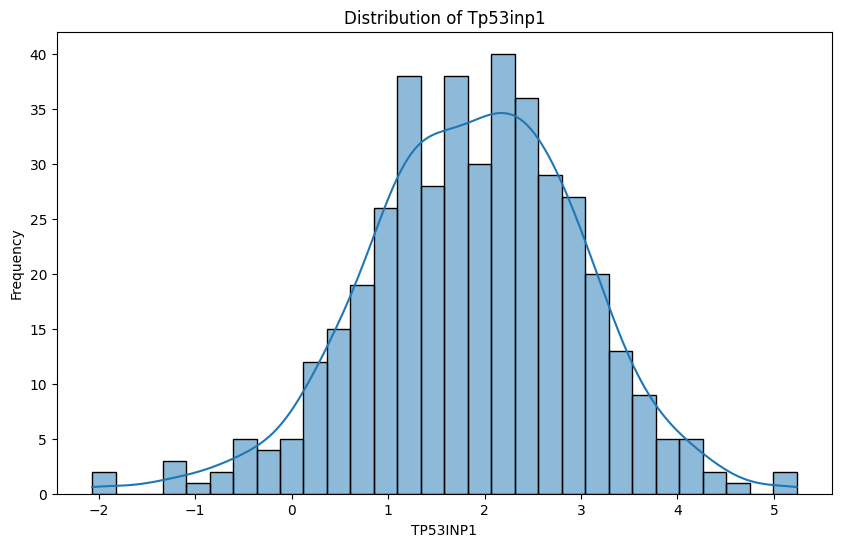

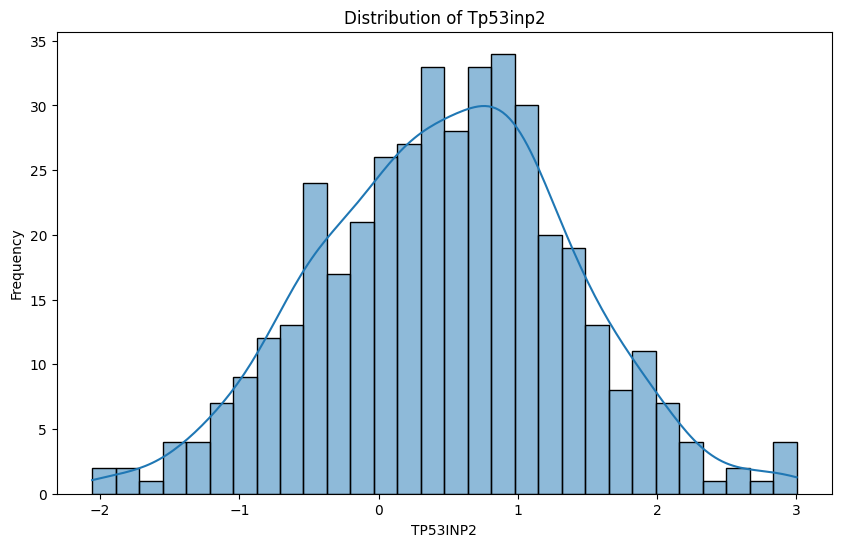

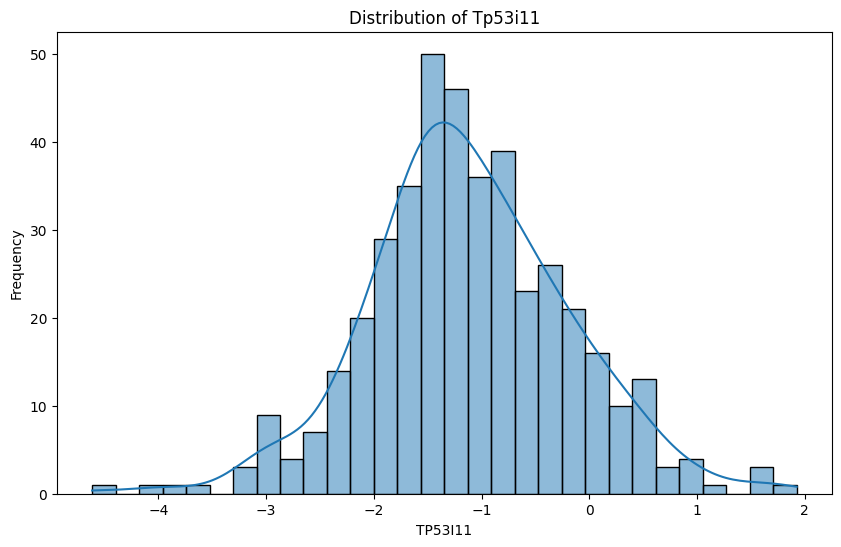

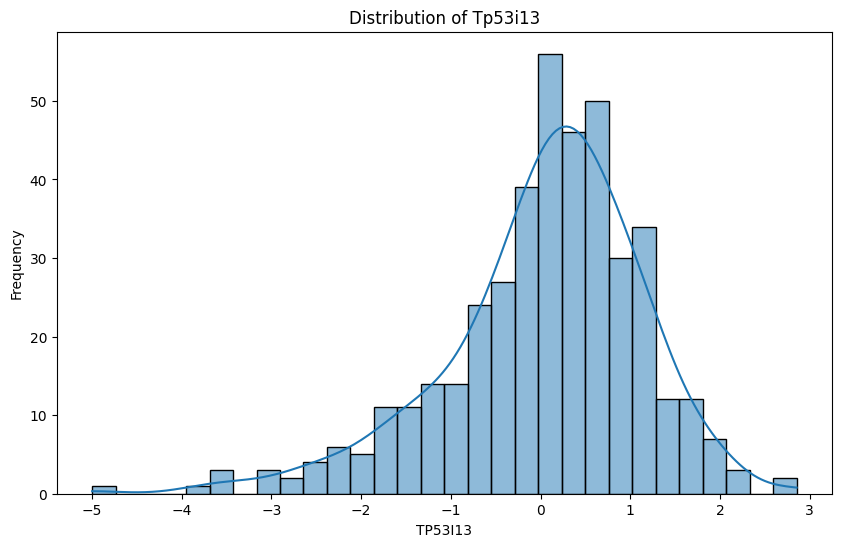

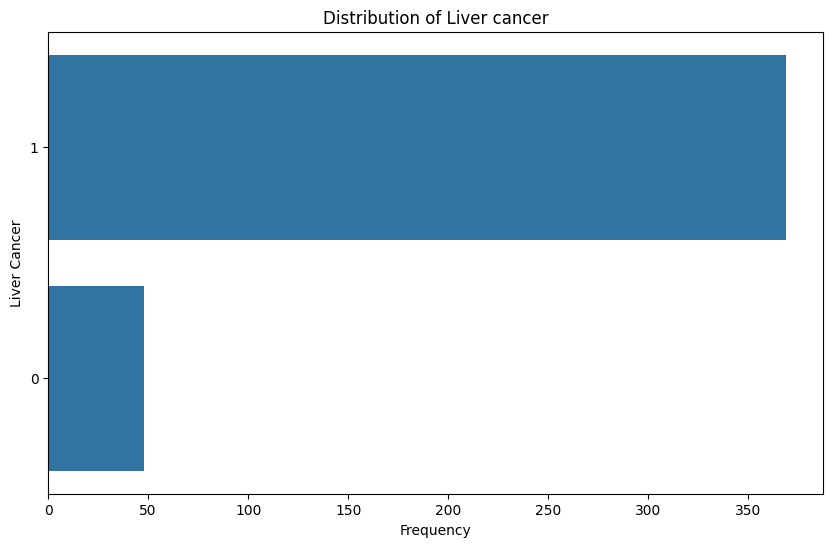

In [9]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [10]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2Y-A9GS-01,58,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,51,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,55,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,54,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1
TCGA-2Y-A9GW-01,64,1.946808,-2.720726,-0.531035,0.060628,-0.660778,-0.31181,-0.215794,0.756054,0.397301,...,1.082783,0.362567,-1.28139,-1.118377,-0.624886,0.903873,1.857205,-0.228533,0.692988,1


### 3. Do regression & Cross Validation

In [11]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1780/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.1483524459282915


In [12]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For tp53:
TP53TG5: Coefficient = -0.02356635289402294, p-value = 0.0019868741364671397
TP53TG3B: Coefficient = 0.0035494692572669265, p-value = 0.7852359861653952
TP53TG1: Coefficient = -0.01428562375628359, p-value = 0.3516734399850402
TP53BP1: Coefficient = 0.01714796597966283, p-value = 0.3523255909140333
TP53RK: Coefficient = 0.013736713736226678, p-value = 0.320764011309888
TP53I3: Coefficient = 0.018314117952141905, p-value = 0.14549650489176577
TP53BP2: Coefficient = 0.009676404202213645, p-value = 0.5079560905216405
TP53AIP1: Coefficient = 0.00935798564016651, p-value = 0.3044582588548647
TP53: Coefficient = -0.000489485207527817, p-value = 0.9659394300077664
TP53INP1: Coefficient = -0.0018642633225894188, p-value = 0.8915934473914134
TP53INP2: Coefficient = 0.002628213300450003, p-value = 0.8459022687295333
TP53I11: Coefficient = 0.002764591635191351, p-value = 0.8617066880469738
TP53I13: Coefficient = 0.0021264436911581294, p-value = 0.8385393786410017

F

### 4. Discussion

In [13]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 gene and Liver Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and Liver Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and Liver Cancer when considering the influence of age.




In [14]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: TP53TG5
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: TP53TG3B
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53RK
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53I3
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP2
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53AIP1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53INP1
Coefficient is neg

In [15]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: TP53TG5
Conclusion: H1 is confirmed: There is an association between the expression of the TP53TG5 and Liver Cancer when considering the influence of age.

Variable: TP53TG3B
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG3B gene and Liver Cancer when considering the influence of age.

Variable: TP53TG1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG1 gene and Liver Cancer when considering the influence of age.

Variable: TP53BP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53BP1 gene and Liver Cancer when considering the influence of age.

Variable: TP53RK
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expr